# FastICA Algorithm Implementation

In [242]:
import librosa as lb
import soundfile as sf
from sklearn.decomposition import FastICA
import numpy as np
from matplotlib import pyplot as plt

##### reading the input files, one with music dominated and other with voice dominated
source 1: voice dominated and source 2: music dominated

In [245]:
voice, Vfs = sf.read('/Users/rajeshr/Desktop/Voice.wav')
print('Voice: length = {} and sampling freq : = {} '.format(len(voice), Vfs))

music, Mfs = sf.read('/Users/rajeshr/Desktop/Music.wav')
print('Music: length = {} and sampling freq : = {}  '.format(len(music), Mfs))

Voice: length = 473280 and sampling freq : = 48000 
Music: length = 422420 and sampling freq : = 44100  


##### slicing it into same length and same number of channels (1D)

In [246]:
if len(voice) > len(music):
    voice = voice[:len(music)]
else:
    music = music[:len(voice)]
    
print('After Slicing Length & channels\nVoice = {}, Music = {}'.format(len(voice), len(music)))

#print(voice.shape, music.shape)
a, b = voice.T   #.mpeg has 2 channels. so taking the average
voice = (a+b)/2
print(voice.shape, music.shape)

After Slicing Length & channels
Voice = 422420, Music = 422420
(422420,) (422420,)


##### Plotting graphs

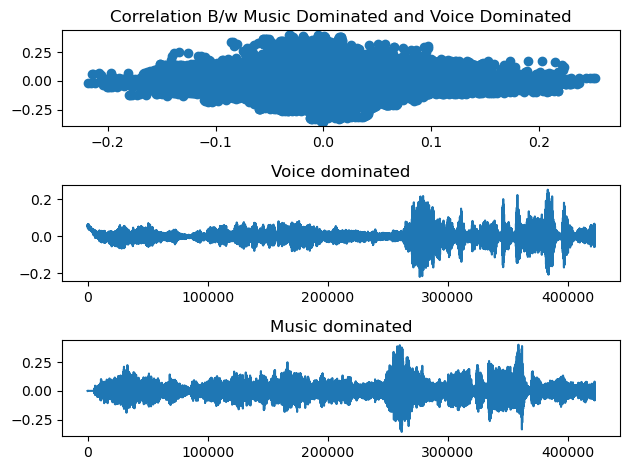

In [256]:
plt.subplot(3, 1, 1)
plt.scatter(voice, music)
plt.title('Correlation B/w Music Dominated and Voice Dominated')

plt.subplot(3, 1, 2)
x = np.arange(len(voice))
plt.plot(x, voice)
plt.title('Voice dominated')

plt.subplot(3, 1, 3)
plt.plot(x, music)
plt.title('Music dominated')
plt.tight_layout()
plt.show()

### Performing ICA

MIXING MATRIX A
 [[ 1.82349392e+01 -1.51081542e-02]
 [ 6.59276784e-02  3.44798514e+01]]


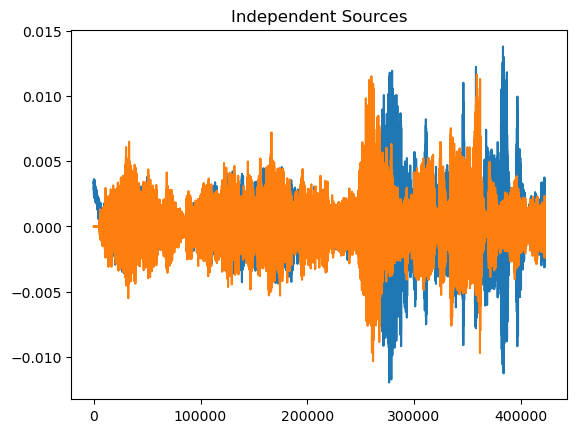

In [252]:
combinedSignals = np.c_[voice, music]

ica = FastICA(n_components=2)
S_ = ica.fit_transform(combinedSignals)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix
print('MIXING MATRIX A\n', A_)

xs = np.arange(len(S_))
plt.plot(xs, S_)
plt.title('Independent Sources')
plt.show()

samples, components = S_.T

##### Writing individual .wav files

In [254]:
sf.write('/Users/rajeshr/Desktop/Research/ICA/samples.wav', samples, Vfs)
sf.write('/Users/rajeshr/Desktop/Research/ICA/components.wav', components, Mfs)

##### Plotting Input vs Output 

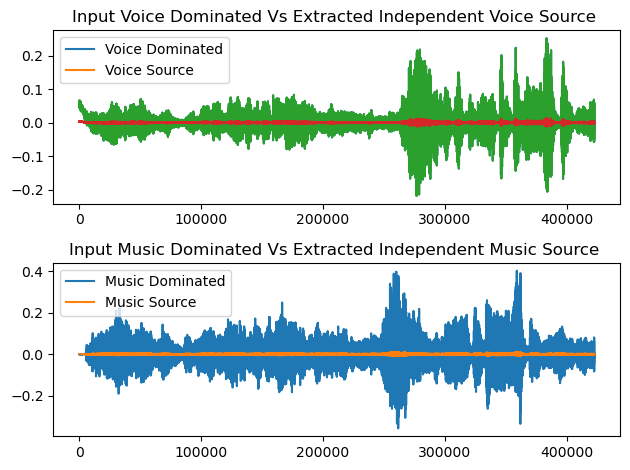

In [258]:
plt.subplot(2, 1, 1)
plt.plot(x, voice)
plt.plot(x, samples)
plt.legend(['Voice Dominated','Voice Source'])
plt.title('Input Voice Dominated Vs Extracted Independent Voice Source ')

plt.subplot(2, 1, 2)
plt.plot(x, music)
plt.plot(x, components)
plt.legend(['Music Dominated','Music Source'])
plt.title('Input Music Dominated Vs Extracted Independent Music Source ')
plt.tight_layout()
plt.show()

# Using Spectogram

(129, 1885)


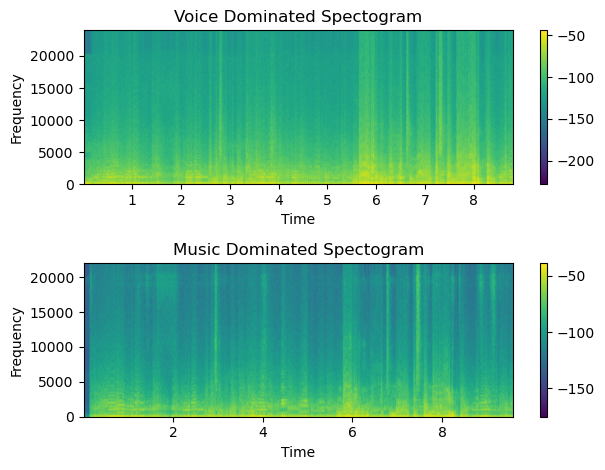

In [265]:
from scipy import signal

Vfrequencies, Vtimes, Vspectrogram = signal.spectrogram(voice, Vfs)
plt.subplot(2, 1, 1)
plt.specgram(abs(voice),Fs=Vfs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("Voice Dominated Spectogram")
plt.colorbar()

Mfrequencies, Mtimes, Mspectrogram = signal.spectrogram(music, Mfs)
print(Mspectrogram.shape)
plt.subplot(2, 1, 2)
plt.specgram(abs(music),Fs=Mfs)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title("Music Dominated Spectogram")
plt.colorbar()

plt.tight_layout()
plt.show()

In [264]:
combinedSignals = np.c_[Vspectrogram, Mspectrogram]

ica = FastICA(n_components=2)
S_ = ica.fit_transform(Mspectrogram)
A_ = ica.mixing_
print('MIXING MATRIX A\n', A_)
print(S_.shape)

MIXING MATRIX A
 [[-1.02617527e-11 -9.95909806e-12]
 [-3.15890375e-11 -3.97955523e-12]
 [-2.82300224e-11 -5.87634237e-12]
 ...
 [-5.71928031e-08 -8.73936323e-07]
 [ 1.91616314e-08 -2.77539514e-06]
 [-1.61583311e-08 -4.09173625e-06]]
(129, 2)


In [261]:
sf.write('/Users/rajeshr/Desktop/Voiceout.wav', voiceOut, Vfs)
sf.write('/Users/rajeshr/Desktop/Musicout.wav', musicOut, Mfs)